<a href="https://colab.research.google.com/github/SaraKarim23/Exploratory-Data-Analysis-EDA-in-Autism_prediction/blob/main/Exploratory_Data_Analysis_(EDA)_in_Autism_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")



In [3]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
sample_df = pd.read_csv('/content/sample_submission.csv')

train_df.shape, test_df.shape, sample_df.shape

((800, 22), (200, 21), (200, 2))

In [4]:
train_df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [5]:
train_df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [6]:


# Identify the target column
[x for x in train_df.columns if x not in test_df.columns]



['Class/ASD']

In [7]:


# Using info() to find the non null rows and data type across columns
train_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [8]:


# Function to extract the categorical columns and numerical columns in separate list for ease of EDA
def get_num_cat_cols(df):
    
    num_cls = [x for x in df.columns if df[x].dtype != 'object']
    cat_cls = [x for x in df.columns if x not in num_cls]

    print(f'Numerical columns \n',num_cls)
    print(f'Categorical columns \n',cat_cls)
    
    return num_cls, cat_cls



In [9]:
num_cols, cat_cols = get_num_cat_cols(train_df)

Numerical columns 
 ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD']
Categorical columns 
 ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']


In [10]:


# Descriptive statistics for numerical columns
train_df[num_cols].describe()



,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000




**Inference**
1. Columns - A1_Score to A10_Score has value either 0 or 1, to be considered as binary variable.
2. Age starts from min 2 yrs to max 89 yrs with median value in 24.8 yrs and average value in 28.45 yrs.
3. Result value ranges from -6.13 to +15.85.
4. Target column indicates there is 20% have Autism and 80% dont have autism.



In [11]:
# Find the unique values with counts in categorical variables, and check for special characters to do cleaning
for c in cat_cols:
    print('-'*100)
    print(f'Column Name - {c}')
    print('-'*100)
    print(train_df[c].value_counts())

----------------------------------------------------------------------------------------------------
Column Name - gender
----------------------------------------------------------------------------------------------------
m    530
f    270
Name: gender, dtype: int64
----------------------------------------------------------------------------------------------------
Column Name - ethnicity
----------------------------------------------------------------------------------------------------
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: ethnicity, dtype: int64
----------------------------------------------------------------------------------------------------
Column Name - jaundice
----------------------------------------------------------------------------

In [12]:
train_df['relation'] = train_df['relation'].replace('?','Others')
train_df['ethnicity'] = train_df['ethnicity'].replace('?','others')

test_df['relation'] = test_df['relation'].replace('?','Others')
test_df['ethnicity'] = test_df['ethnicity'].replace('?','others')

In [13]:


# checking the value in test data, to drop the column in both train and test dataset
test_df['age_desc'].value_counts()



18 and more    200
Name: age_desc, dtype: int64

In [14]:


train_df.drop('age_desc',axis=1,inplace=True)
test_df.drop('age_desc',axis=1,inplace=True)



In [15]:
# Recreating the numerical and categorical columns list
num_cols, cat_cols = get_num_cat_cols(train_df)

Numerical columns 
 ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD']
Categorical columns 
 ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']


In [16]:


# Moving the binary variables in numerical columns to categorical columns list, for EDA
cat_cols = cat_cols + [x for x in num_cols if '_Score' in x]
print(cat_cols)
num_cols = [x for x in num_cols if x not in cat_cols]
print(num_cols)



['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
['ID', 'age', 'result', 'Class/ASD']


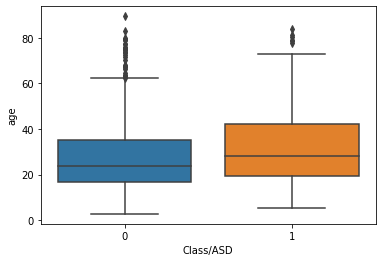

In [17]:


# Feature - age
sns.boxplot(x = train_df['Class/ASD'], y = train_df['age'])



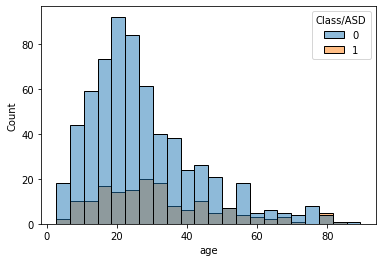

In [18]:


sns.histplot(x = train_df['age'], hue = train_df['Class/ASD'])



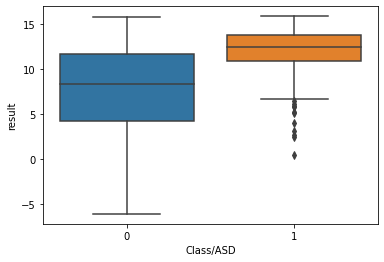

In [19]:


# Feature - result
sns.boxplot(x = train_df['Class/ASD'], y = train_df['result'])





Inference

    Median result of persons having autism is more than who dont have
    Range of result data for person having autism is shorter and higher when compared to person not having autism, this is could be potential classifier of target class



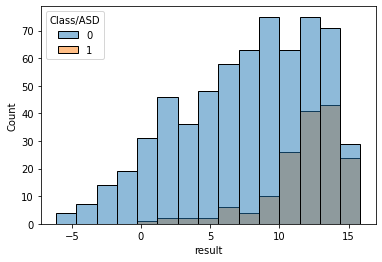

In [20]:
sns.histplot(x = train_df['result'], hue = train_df['Class/ASD'])

In [21]:
# Function to conduct chi square test between categorical feature and target feature 
def chi_sq_test(ct):
    # input crosstab of 2 categorical variables
    stat, p, dof, expected = chi2_contingency(ct)

    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Both variables are Dependent (reject H0)')
    else:
        print('Both variables are Independent (H0 holds true)')

In [22]:
# Function to plot stacked bar graph between categorical feature and target variable, 
# also helps us know the dependent variable using chisquare function - this step is feature selection
def cat_col_test(df, cat_colname, target_colname):
    
    print(f"Column name - {cat_colname}")
    ct = pd.crosstab(df[cat_colname],df[target_colname])
    chi_sq_test(ct)
    ax = ct.plot(kind='bar',stacked=True, rot = 45)
    ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

    for c in ax.containers:
        ax.bar_label(c, label_type='center')
    plt.show()

Column name - gender
p value is 0.9758243168741388
Both variables are Independent (H0 holds true)


AttributeError: ignored

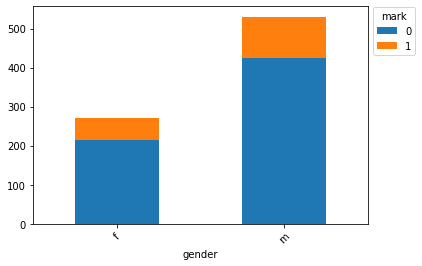

In [23]:
for c in cat_cols:
    cat_col_test(train_df, c, 'Class/ASD')

In [24]:


train_df.drop(['used_app_before','gender'],axis=1,inplace=True)
test_df.drop(['used_app_before','gender'],axis=1,inplace=True)



In [25]:


train_df.columns



Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'result',
       'relation', 'Class/ASD'],
      dtype='object')

In [26]:
# one hot encoding for categorical variables with only 2 unique values
train_df['jaundice'] = np.where(train_df['jaundice'] == 'yes',1,0)
test_df['jaundice'] = np.where(test_df['jaundice'] == 'yes',1,0)

train_df['austim'] = np.where(train_df['austim'] == 'yes',1,0)
test_df['austim'] = np.where(test_df['austim'] == 'yes',1,0)

In [27]:
# Label encoding based on frequency values of categorical variable
dict_ethnicity = dict(zip(train_df['ethnicity'].value_counts().index, range(1,train_df['ethnicity'].nunique()+1)))
dict_ethnicity

{'Asian': 4,
 'Black': 5,
 'Hispanic': 10,
 'Latino': 9,
 'Middle Eastern ': 3,
 'Others': 8,
 'Pasifika': 7,
 'South Asian': 6,
 'Turkish': 11,
 'White-European': 1,
 'others': 2}

In [28]:
train_df['ethnicity'] = train_df['ethnicity'].map(dict_ethnicity)
test_df['ethnicity'] = test_df['ethnicity'].map(dict_ethnicity)

In [29]:
col_name = 'contry_of_res'
dict_country = dict(zip(train_df[col_name].value_counts().index, range(1,train_df[col_name].nunique()+1)))
train_df[col_name] = train_df[col_name].map(dict_country)
test_df[col_name] = test_df[col_name].map(dict_country)

In [30]:
col_name = 'relation'
dict_relation = dict(zip(train_df[col_name].value_counts().index, range(1,train_df[col_name].nunique()+1)))
train_df[col_name] = train_df[col_name].map(dict_relation)
test_df[col_name] = test_df[col_name].map(dict_relation)

In [31]:


train_df.isnull().sum()



ID               0
A1_Score         0
A2_Score         0
A3_Score         0
A4_Score         0
A5_Score         0
A6_Score         0
A7_Score         0
A8_Score         0
A9_Score         0
A10_Score        0
age              0
ethnicity        0
jaundice         0
austim           0
contry_of_res    0
result           0
relation         0
Class/ASD        0
dtype: int64

In [32]:


test_df.isnull().sum()



ID               0
A1_Score         0
A2_Score         0
A3_Score         0
A4_Score         0
A5_Score         0
A6_Score         0
A7_Score         0
A8_Score         0
A9_Score         0
A10_Score        0
age              0
ethnicity        0
jaundice         0
austim           0
contry_of_res    3
result           0
relation         0
dtype: int64

In [33]:
# Fillna with mode value for categorical variable
test_df['contry_of_res'].fillna(1.0,inplace=True)

In [34]:
X = train_df.drop(['ID','Class/ASD'],axis=1)
y = train_df['Class/ASD']

X.shape, y.shape

((800, 17), (800,))

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [36]:
seed = 123
model1 = LogisticRegression(max_iter = 500)
model2 = SVC(random_state = seed)
model3 = GaussianNB()
model4 = MLPClassifier(random_state = seed,max_iter=500)
model5 = SGDClassifier(random_state = seed)
model6 = KNeighborsClassifier()
model7 = DecisionTreeClassifier(random_state = seed)
model8 = RandomForestClassifier(random_state = seed,class_weight="balanced")
model9 = GradientBoostingClassifier(random_state = seed)
model10 = LGBMClassifier(random_state = seed)
model11 = XGBClassifier(random_state = seed,use_label_encoder=False)

In [37]:
from sklearn.model_selection import cross_val_score

models = [model1,model2,model3,model4,model5,model6,model7,
          model8,model9,model10,model11]


for m in range(len(models)):
    model = models[m]
    scores = cross_val_score(model, X, y, scoring = 'roc_auc', cv = 5)
    print(f"For no of trees {m+1} - {np.mean(scores)}")

For no of trees 1 - 0.9067675245317346
For no of trees 2 - 0.8646327672952457
For no of trees 3 - 0.9090057424018732
For no of trees 4 - 0.8993940931833094
For no of trees 5 - 0.8498409095569375
For no of trees 6 - 0.7861399776865605
For no of trees 7 - 0.7247017418277262
For no of trees 8 - 0.9055184053253995
For no of trees 9 - 0.9005207168262348
For no of trees 10 - 0.8993564613904796
For no of trees 11 - 0.9055655091453412


In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

kfold = 5
skf = StratifiedKFold(n_splits=kfold, shuffle = True)

X1 = np.array(X)
y1 = np.array(y)
scores = []

for i, (train_index, test_index) in enumerate(skf.split(X1, y1)):
    print('[Fold %d/%d]' % (i + 1, kfold))
    X_train, X_valid = X1[train_index], X1[test_index]
    y_train, y_valid = y1[train_index], y1[test_index]
    
    model1 = LogisticRegression(max_iter = 1000, C=1.0,penalty='l2',solver='newton-cg')
    model1.fit(X_train,y_train)
    y_pred1 = pd.DataFrame(model1.predict_proba(X_valid))[1].values
    
    model2 = RandomForestClassifier(random_state=123,class_weight="balanced")
    model2.fit(X_train,y_train)
    y_pred2 = pd.DataFrame(model2.predict_proba(X_valid))[1].values
    
    model3 = GaussianNB()
    model3.fit(X_train,y_train)
    y_pred3 = pd.DataFrame(model3.predict_proba(X_valid))[1].values
    
    y_pred = 0.2 * y_pred1 + 0.15 * y_pred2 + 0.65*y_pred3
    score = roc_auc_score(y_valid, y_pred)
    y_pred_label = np.where(y_pred<0.5,0,1)
    #print(classification_report(y_valid,y_pred_label))
    scores.append(score)
    
    print(f'Fold {i + 1}/{kfold} - Score: {score}')   

print(f"Avg scores - {np.mean(scores)}")

[Fold 1/5]
Fold 1/5 - Score: 0.89404296875
[Fold 2/5]
Fold 2/5 - Score: 0.91259765625
[Fold 3/5]
Fold 3/5 - Score: 0.906494140625
[Fold 4/5]
Fold 4/5 - Score: 0.8779296875
[Fold 5/5]
Fold 5/5 - Score: 0.9513242662848963
Avg scores - 0.9084777438819792


In [39]:
x_test = np.array(test_df.drop('ID',axis=1))
y_pred_test1 = pd.DataFrame(model1.predict_proba(x_test))[1].values
y_pred_test2 = pd.DataFrame(model2.predict_proba(x_test))[1].values
y_pred_test3 = pd.DataFrame(model3.predict_proba(x_test))[1].values
y_pred_final = 0.2 * y_pred_test1 + 0.15 * y_pred_test2 + 0.65 * y_pred_test3

In [40]:
submission = pd.DataFrame({'ID':test_df['ID'],
                           'Class/ASD':y_pred_final})
submission.head()

,ID,Class/ASD
0,1,0.109354
1,2,0.001673
2,3,0.395727
3,4,0.001292
4,5,0.014679


In [41]:
submission.to_csv("submission.csv",index=False)